In [11]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy
import re
import itertools
from itertools import combinations
from itertools import permutations
from functools import reduce
import random
from collections import defaultdict



In [12]:
def MaximalNodes(G):
    edges=list(G.edges())
    nodes=list(G.nodes())
    H=nx.DiGraph()
    maxnodes=[]
    cleanmaxnodes=[]
    Digraph=False

    occur=[0 for i in range(0,len(nodes))]
    
    # Collect maximal nodes
    
    
    for i, node in enumerate(nodes):
        for edge in edges:
            if edge[0]==node or edge[1]==node:
                occur[i]=occur[i]+1
        if occur[i]==1:
            maxnodes.append(node)
    
    if maxnodes==[]:
        return(nodes)
    
    if type(G)==type(H):
        for i in range(0,len(edges)):
            if edges[i][0] in maxnodes:
                cleanmaxnodes.append(edges[i][0])
        Digraph=True
        if cleanmaxnodes==[]:
            return([random.choice(nodes)])
    
    
    if Digraph==True:
        return(cleanmaxnodes)

    elif Digraph==False:
        return(maxnodes)



def MPathMatrix(mset,graph):
    nodes=list(graph.nodes())
    binpath=[]
    matbin=np.zeros((len(nodes),len(mset)),dtype=int)
    
    for k in range(len(nodes)):
        for i in range(len(mset)):
            if nodes[k] in mset[i]:
                matbin[k][i]=1
                
    for i in range(len(nodes)):
        binpath.append(int("".join(map(str,matbin[i])),2))
    mat=[nodes,binpath]
     
    return (mat)
            
def DictNodes(mat):
    d=dict()
    l=[]
    for i in range(0,len(mat[0])):
        for j in range(0,len(mat[0])):
            if mat[1][i] not in d:
                d[mat[1][i]]=set()
            if i==j:
                d[mat[1][i]].add(mat[0][j])
    for k in d.items():
        l.append(list(k[1]))
        
    return l
                

In [13]:



def CreateEdges(oc, vertex):
    edges=set()
    if len(vertex)>1:
        for el in oc:
            l = []
            for i, el2 in enumerate(el):
                if el2 == 1:
                    l.append(str(vertex[i]))
            edges.update(set(map(frozenset, frozenset(permutations(l,2)))))
    if edges==[] or len(vertex)==1:
        edges=[vertex[0]]
        return (edges)
    return(edges)

def CreateSimplices(oc, vertex):
    simplices=set()
    simplices2=[]
    if len(vertex)>1:
        for el in oc:
            for j in range(2,len(vertex)+1):
                l = []
                for i, el2 in enumerate(el):
                    if el2 == 1:
                        l.append(str(vertex[i]))
                simplices.update(set(map(frozenset, frozenset(permutations(l,j)))))
        if simplices==set():
            simplices.update(set(list(vertex[0])))
    #conversion en liste
    simplices=list(simplices)
    for i in range(len(simplices)):
        simplices2.append(list(simplices[i]))
    
    for i in list(map(list,vertex)):    
        simplices2.append([str(i)])
        
    return(simplices2)

In [14]:
def get_node_attributes(G1, G2, node1, node2):
   # function to get node attributes and creates vertex attributes for the simplicial complex
    attributes = G1.nodes[node1]

    for attribute, value in attributes.items():
        if attribute in G2.nodes[str(node2)]:
            if value not in G2.nodes[str(node2)][attribute]:
                G2.nodes[str(node2)][attribute] = G2.nodes[str(node2)].get(attribute, []) + [value]
        else :
            G2.nodes[str(node2)][attribute] = G2.nodes[str(node2)].get(attribute, []) + [value]

        
def AddVertexAttributes(G1,G2,V):
  # Creates vertices attributes
    nodeinfo=list(G1.nodes(data=True))
    
    if nodeinfo==[]:
        return()
      
    else:
        for i in range(len(nodeinfo)):
            for j in range(len(V)):
                if nodeinfo[i][0] in V[j]:
                    get_node_attributes(G1,G2, nodeinfo[i][0],V[j])
                    
                    
                    break

def AddSimplicesAttributes(G1,G2,S):
    # Creates simplices attributes
    nodeinfo1=list(G1.nodes(data=True))
    nodeinfo2=list(G2.nodes(data=True))
    nodes=list(G1.nodes())
    vertex=list(G2.nodes())
    d=dict()
    # First part that creates the empty dictionnary with the attributes and possibles values
    if nodeinfo1==[]:
        return()
      
    else:
        for i in range(len(nodes)):
            for attribute, value in nodeinfo1[i][1].items():
                if attribute not in d:
                    d[attribute]=dict()
                    d[attribute][value]=list()
                else:
                    if value not in d[attribute]:
                        d[attribute][value]=list()
                        
    
    # Second part to add the simplices in the right places
    for i in range(len(vertex)):
        for j in range(len(S)):
            if nodeinfo2[i][0] in S[j]:
                for attribute,values in nodeinfo2[i][1].items():
                    for value in values:
                        if S[j] not in d[attribute][value]:

                            d[attribute][value].append(S[j])
    return(d)
                
        
        
                   
def has_intersection(list1, list2):
    # Convertir les listes en ensembles pour utiliser l'opérateur d'intersection
    set1 = set(list1)
    set2 = set(list2)
    
    # Utiliser l'opérateur d'intersection (&) pour trouver les éléments communs
    intersection = set1 & set2
    
    # Retourner l'intersection
    return intersection            
                


def get_simplices_by_attribute(d, rtype, maxpath):
    
    if rtype=="BASIC":
        # you input the attribute's name and a value and returns all the simplices who have this attribute's value
        attribute = input("Enter attribute's name : ")

        value = input(f"Enter attribute's value '{attribute}' : ")

        if attribute in d:
            if value in d[attribute]:
                result1=d[attribute][value]
                result2=[result1[0]]
            else:
                raise ValueError(f"No value '{value}' matches attribute '{attribute}'")
        else:
            raise ValueError(f"No attribute '{attribute}'")
        
        # to choose all the biggest simplices that contain this value
        if result1:
            for r1 in result1:
                
                for r2 in result2:
                    if len(r1)>len(r2):
                        result2=[r1]
                        
                    elif len(r1)==len(r2) and r1 not in result2:
                        result2.append(r1)
                    
                    
                
            print(f" Simplices with the attribute's name '{attribute}' and the value '{value}' are :")
            for r in result2:
                print(r)
        

        else:

            print(f"No simplices with the attribute's name '{attribute}' and the value '{value}'")
            
    elif rtype=="OR":
        # you input two attributes' name and their value and returns all the simplices who have at least one of these attributes' value
        
        attribute1 = input("Enter attribute 1's name : ")
        value1 = input(f"Enter attribute 1's value '{attribute1}' : ")
        
        attribute2 = input("Enter attribute 2's name : ")
        value2 = input(f"Enter attribute 2's value '{attribute2}' : ")

        result1=d[attribute1][value1]
        result2=[result1[0]]
        
        result3=d[attribute2][value2]
        result4=[result3[0]]
        
        
        if result1 or result3:
        
        # [ATTRIBUTE1]
        # to choose all the biggest simplices that contain this value
        
        
            
        
            for r1 in result1:
                
                for r2 in result2:
                    if len(r1)>len(r2):
                        result2=[r1]
                        
                    elif len(r1)==len(r2) and r1 not in result2:
                        result2.append(r1)
                    
        # [ATTRIBUTE2] 
        # to choose all the biggest simplices that contain this value
        
            
        
        
            for r3 in result3:
                
                for r4 in result4:
                    if len(r3)>len(r4):
                        result4=[r3]
                        
                    elif len(r3)==len(r4) and r3 not in result4:
                        result4.append(r3)            
            
            print(f" Simplices with the attribute's name '{attribute1}' and the value '{value1}' or '{attribute2}' and the value '{value2}' are :")
            
            result=result2
            for el in result4:
                if el not in result:
                    result.append(el)
            
            s=set()       
            for r in result:
                s.update(r)
            s=list(s)
            print(s)
        

        else:

            print(f"No simplices with the attribute's name '{attribute1}' and the value '{value1}' or '{attribute2}' and the value '{value2}'")
    
    
    elif rtype=="AND":
        # you input two attributes' name and their value and returns all the simplices who have both these attributes' value
        
        attribute1 = input("Enter attribute 1's name : ")
        value1 = input(f"Enter attribute 1's value '{attribute1}' : ")
        
        attribute2 = input("Enter attribute 2's name : ")
        value2 = input(f"Enter attribute 2's value '{attribute2}' : ")

        result1=d[attribute1][value1]
        result2=[result1[0]]
        
        result3=d[attribute2][value2]
        result4=[result3[0]]
        
        
        if result1 or result3:
        
        # [ATTRIBUTE1]
        # to choose all the biggest simplices that contain this value
        
            for r1 in result1:
                
                for r2 in result2:
                    if len(r1)>len(r2):
                        result2=[r1]
                        
                    elif len(r1)==len(r2) and r1 not in result2:
                        result2.append(r1)
            
            s1=set()       
            for r in result2:
                s1.update(r)
            
            
            
                    
        # [ATTRIBUTE2] 
        # to choose all the biggest simplices that contain this value
        
            for r3 in result3:
                
                for r4 in result4:
                    if len(r3)>len(r4):
                        result4=[r3]
                        
                    elif len(r3)==len(r4) and r3 not in result4:
                        result4.append(r3)            
            
            s2=set()       
            for r in result4:
                s2.update(r)
            
        #To get the intersection
        
            s=s1 & s2
            s=list(s)  
            mess="".join(s)
            mess=re.sub('[^a-zA-Z]+', '', mess)
            result=[]
            for m in mess:
                result.append(m)
            if s:
                for m in maxpath:
                    if set(result)==set(m):
                        print(f" The intersection with the attribute's name '{attribute1}' and the value '{value1}' AND '{attribute2}' and the value '{value2}' is MAXIMAL and is: ")
                        print(s)
                        break
                else:
                    print(f" The intersection with the attribute's name '{attribute1}' and the value '{value1}' AND '{attribute2}' and the value '{value2}' is NOT MAXIMAL and is: ")
                    print(s)
            else:
                print(f" No intersection with the attribute's name '{attribute1}' and the value '{value1}' AND '{attribute2}' and the value '{value2}' ")
                
                
           
    

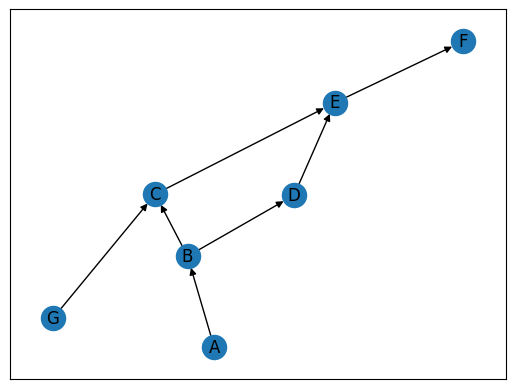

Vertex set for the simplicial complex: [['B', 'A'], ['C'], ['D'], ['F', 'E'], ['G']]


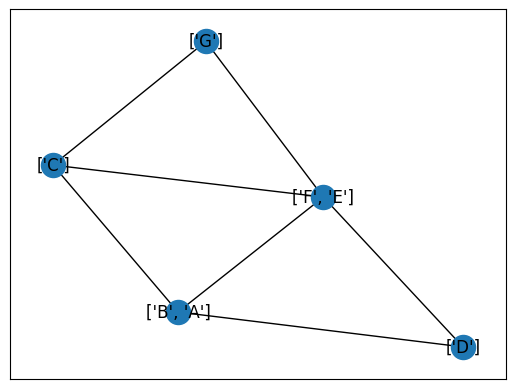

[("['B', 'A']", {'color': ['red', 'blue'], 'shape': ['triangle']}), ("['F', 'E']", {'color': ['red']}), ("['C']", {'color': ['green']}), ("['D']", {'shape': ['circle']}), ("['G']", {'color': ['yellow']})]


In [15]:
def dfs_paths(graph, start_node, path, visited, all_paths):
    """
    Recursive function to perform a depth-first search and collect all maximal paths.
    :param graph: The NetworkX graph.
    :param start_node: The current node to visit.
    :param path: The current path being constructed.
    :param visited: A set of already visited nodes.
    :param all_paths: A list to store all maximal paths.
    """
    visited.add(start_node)
    path.append(start_node)
    
    # Get neighbors that are not visited
    neighbors = [neighbor for neighbor in graph[start_node] if neighbor not in visited]

    if not neighbors:
        # If there are no unvisited neighbors, current path is maximal
        all_paths.append(path.copy())
    else:
        for neighbor in neighbors:
            dfs_paths(graph, neighbor, path, visited, all_paths)
    
    # Backtrack
    path.pop()
    visited.remove(start_node)

def find_all_maximal_paths(graph, start_node):
    """
    Function to find all maximal paths starting from given nodes.
    :param graph: The NetworkX graph.
    :param start_node: The starting nodes for the DFS.
    :return: A list of all maximal paths.
    """
    
    all_paths = []
    for i in range(0,len(start_node)):
        
        visited = set()
        path = []
        dfs_paths(graph, start_node[i], path, visited, all_paths)  
        
    return all_paths

# # Example usage
# n = 6  # 10 nodes
# m = 12 # 20 edges
# seed = 20160  # seed random number generators for reproducibility

# # # Use seed for reproducibility
# G1 = nx.gnm_random_graph(n, m, seed=seed)



# pos = nx.spring_layout(G1, seed=seed)  # Seed for reproducible layout
# nx.draw_networkx_nodes(G1, pos)
# nx.draw_networkx_edges(G1, pos)
# nx.draw_networkx_labels(G1, pos)
# plt.show()

# G1=nx.random_labeled_tree(50)
# pos = nx.spring_layout(G1)  
# nx.draw_networkx_nodes(G1, pos)
# nx.draw_networkx_edges(G1, pos)
# nx.draw_networkx_labels(G1, pos)
# plt.show()

G1=nx.DiGraph()
G1.add_nodes_from([('A',{"color":"red","shape":"triangle"}), ('B',{"color":"blue"}), ('C',{"color":"green"}), ('D',{"shape":"circle"}), ('E',{"color":"red"}), ('F',{"color":"red"}),
                   ('G',{"color":"yellow"})])

G1.add_edges_from([('A','B'),
                   ('B','C'),
                   ('B','D'),
                   ('C','E'),
                   ('D','E'),
                   ('G','C'),
                   ('E','F')
                   ])

pos = nx.spring_layout(G1)  
nx.draw_networkx_nodes(G1, pos)
nx.draw_networkx_edges(G1, pos)
nx.draw_networkx_labels(G1, pos)
plt.show()

# Start finding all maximal paths from maximal nodes
start_node = MaximalNodes(G1)
# print("Maximal Nodes are :",start_node)
    
all_maximal_paths=find_all_maximal_paths(G1, start_node)
    
maximalset=set()
maximallist=[]

# Print all maximal paths from the maximal nodes

for path in all_maximal_paths:
    maximalset.add(frozenset(path))
        
mset=list(maximalset) # for the vertices

for path in mset:
    maximallist.append(list(path)) 

# print("All maximal paths :", maximallist)

# Print the vertex set for the simplicial complex (first we check that mset is not empty)
if mset:
    V=DictNodes(MPathMatrix(mset,G1))
        
    # print("Vertex set for the simplicial complex:", V)
    

#Conversion tuple to list for edges

G1edges=list(G1.edges())
G2edges=[]
for k in range(0,len(G1edges)): 
    G2edges.append(list(G1edges[k]))

# function to test for each element of a list 1 
# if this element is in another list 2

def isInList(list1, list2):
    for el in list1:
        if el not in list2:
            return False
    return True

occurV = []

# Fill the list with lists for each vertices 
# that contains 1 or 0 considering if they appear in maximal paths lists or not

for path in maximallist:
    l = []
    for v in V:
        l.append(1 if isInList(v, path) else 0)
    occurV.append(l)
# print(occurV)
            
                
newedges=CreateEdges(occurV, V)
# print("Edges list : ", newedges)

G2 = nx.Graph()


if len(newedges)==1:
    G2.add_node(str(newedges[0]))
else:
    G2.add_edges_from(newedges)

AddVertexAttributes(G1,G2,V)

simplices=CreateSimplices(occurV, V)



# print("Simplices set :", simplices)


pos = nx.spring_layout(G2)
nx.draw_networkx_nodes(G2, pos)
nx.draw_networkx_edges(G2, pos)
nx.draw_networkx_labels(G2, pos)
plt.show()

# print(list(G2.nodes(data=True)))

d=AddSimplicesAttributes(G1,G2,simplices)

# get_simplices_by_attribute(d,"AND", maximallist)
